<a href="https://colab.research.google.com/github/brunobro/deteccao-remocao-de-outliers/blob/main/MI_Remo%C3%A7%C3%A3oOutlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecção/Remoção de Outliers com Python: Casos Univariado e Multivariado**

**Outlier:** é aquele valor muito discrepante em relação aos demais valores para uma certa variável. <u>É um valor atípico</u>. 

*Ele interfere no cálculo das estatísticas, por isso, em muitas situações deve ser removido. Em outras ele pode ser mantido para ser estudado separadamente.*

**Fontes de outliers:** Pode ser devido a:
* (Caso artificial): erros de registro do(s) dado(s);

    *Ex: a pessoa anotou a temperatura do paciente como sendo 73,2º quando deveria ter anotado o valor 37,2º.*

* (Caso natural): proveniente de um evento raro;

    *Ex: um dos familiares ganha na loteria aumentando muito sua renda em relação aos demais.*

In [ ]:
'''
Bibliotecas necessárias
'''
import numpy as np
import matplotlib.pyplot as plt

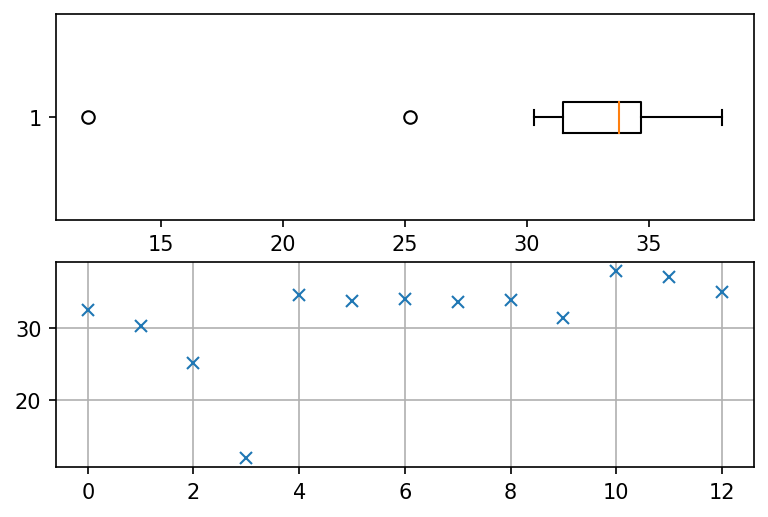

In [ ]:
'''
Dados de temperatura de uma certa cidade em um certo período
'''
temp = np.array([32.5, 30.3, 25.2, 12.0, 34.7, 33.8, 34.1, 33.7, 33.9, 31.5, 38.00, 37.2, 35.1])

plt.figure(dpi=150)
plt.subplot(211)
plt.boxplot(temp, vert=False)
plt.subplot(212)
plt.plot(temp, 'x')
plt.grid()
plt.show()

# **Métodos para detecção de Outliers**

*   Univariado

    *   Intervalo interquartil

    *   Z-score

* Multivariado

    *   Envelope Elíptico

    *   Isolation Forest




# **Remoção e Manutenção de Outliers**

Após a detecção os outliers podem ser removidos ou mantidos.

Essa decisão dependerá das características do problema que se pretende resolver.



#**Caso Univariado**

Remoção e Obtenção dos Outliers para uma única variável

**Intervalor interquartil**

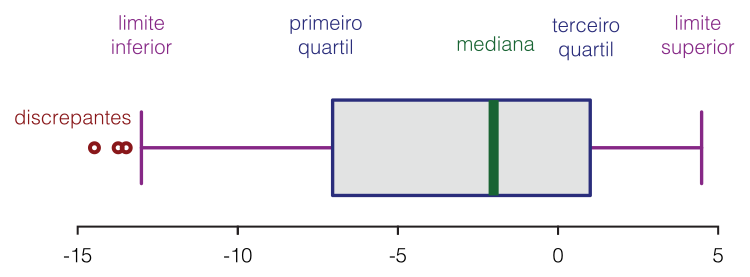
Referência: https://pt.wikipedia.org/wiki/Amplitude_interquartil

**1º Passo:** Calcular os quartis 

* Q1: 25º percentil (quartil inferior)
* Q3: 75º percentil (quartil superior)

In [ ]:
Q1 = np.percentile(temp, 25)
Q3 = np.percentile(temp, 75)

print('Q1: %.2f' %Q1)
print('Q3: %.2f' %Q3)

Q1: 31.50
Q3: 34.70


**2º Passo:** Calcular Intervalor interquartil (IIQ) e os limites inferior e superior, utilizando uma constante $C$, que geralmente recebe o valor 1,5.

In [ ]:
C   = 1.5
IIQ = Q3 - Q1
LI  = Q1 - C*IIQ
LS  = Q3 + C*IIQ

print('IIQ: %.2f' %IIQ)
print('Limites:')
print(' Inferior: %.2f' %LI)
print(' Superior: %.2f' %LS)

IIQ: 3.20
Limites:
 Inferior: 26.70
 Superior: 39.50


**3º Passo:** Obtém e Remove os Outliers, que são os valores abaixo do limite inferior $LI$ ou acima do limite superior $LS$.

In [ ]:
#Obtém e Remove os Outliers
temp_sem_outliers_IIQ = []
outliers              = []
for t in temp:
    if t > LS or t < LI:
        outliers.append(t)
    else:
        temp_sem_outliers_IIQ.append(t)

print('Outliers: ')
print(outliers)
print('Sem Outliers: ')
print(temp_sem_outliers_IIQ)

Outliers: 
[25.2, 12.0]
Sem Outliers: 
[32.5, 30.3, 34.7, 33.8, 34.1, 33.7, 33.9, 31.5, 38.0, 37.2, 35.1]


**Z-score**

Z-score ($Z$) é uma medida relacionada a distância que um ponto está da média, em função des desvios padrão, isto é:

$$
Z = \frac{X - \mu}{\sigma}
$$

Se $Z < 0$ o dado observado está abaixo da média.

Se $Z > 0$ o dado observado está acima da média.


<u>Valores de Z-score - Distribuição Normal</u>
<table>
<thead>
<tr><td>Percentual dos dados</td><td>Desvios padrão</td></tr>
</thead>
<tr><td>68%<td>$\pm 1$</td></tr>
<tr><td>95%<td>$\pm 2$</td></tr>
<tr><td>99,7%<td>$\pm 3$</td></tr>
</table>

<u>Cuidados a tomar:</u>
*   Deve ser utilizada se a distribuição dos dados for Gaussiana (Normal).
*   Em pequenos conjuntos de dados (menor que 10) retorna valores não confiáveis
* É sensível a muitos Outliers. Os Z-scores tornam-se menos extremos.


**1º Passo:** Calcular o Z-score

In [ ]:
z_scores = (temp - np.mean(temp)) / np.std(temp)

print('Z-scores: ', z_scores)

Z-scores:  [ 0.12503225 -0.21553179 -1.00502117 -3.04840544  0.4655963   0.32627465
  0.3727152   0.31079446  0.34175483 -0.02976958  0.97644237  0.8526009
  0.52751704]


**2º Passo:** Remoção e Obtenção dos Outliers, ou seja, os Z-scores que ultrapassam o limiar $\pm 3 \sigma$.

In [ ]:
limiar = 3 #3 desvios padrão
temp_sem_outliers_Z_score = []
outliers                  = []
for i, z_score in enumerate(z_scores):
    if np.abs(z_score) > limiar:
        outliers.append(temp[i])
    else:
        temp_sem_outliers_Z_score.append(temp[i])
        
print('Outliers: ')
print(outliers)
print('Sem Outliers: ')
print(temp_sem_outliers_Z_score)

Outliers: 
[12.0]
Sem Outliers: 
[32.5, 30.3, 25.2, 34.7, 33.8, 34.1, 33.7, 33.9, 31.5, 38.0, 37.2, 35.1]


# **Caso Multivariado**

Considera-se a remoção/detecção de Outliers em espaços de entrada de mais alta dimensão

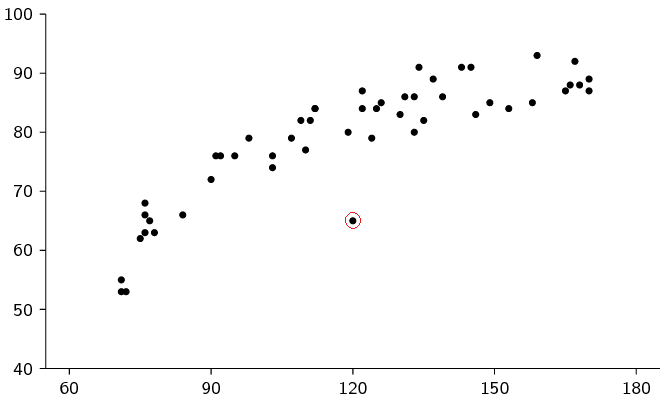

In [ ]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y = True)

print('Nº Variáveis: %i' %X.shape[1])
print('Nº Amostras: %i' %X.shape[0])

Nº Variáveis: 10
Nº Amostras: 442


**Envelope Elíptico**

É uma técnica relacionada ao Determinante de Covariância Mínima, que é um estimador altamente robusto para estimação de dispersão multivariada.

* Supõe uma distribuição Gaussiana

Em síntese, emprega a ideia de uma hiperesfera (hiperelipse) no espaço de entrada, com uma distribuição Gaussiana. Aquelas amostras que estão fora desta hiperesfera são consideradas Outliers.

Referência: https://arxiv.org/pdf/1709.07045.pdf

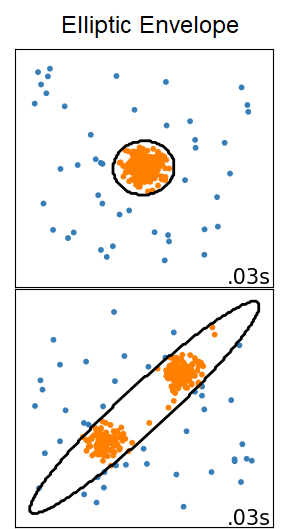

Referência: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py

In [ ]:
from sklearn.covariance import EllipticEnvelope

#Retorna -1 se a amostra é Outlier e 1 caso contrário
#O parâmetro 'contamination' é a proporção de Outliers no conjunto de dados. 
#Varia entre (0,0.5]
out_EE = EllipticEnvelope(contamination=0.1).fit_predict(X)

outliers = X[out_EE == -1, :]
X_out    = X[out_EE == 1, :]

print('Nº Outliers: %i' % outliers.shape[0])
print('\nDados sem Outliers')
print('Nº Variáveis: %i' %X_out.shape[1])
print('Nº Amostras: %i' %X_out.shape[0])

Nº Outliers: 45

Dados sem Outliers
Nº Variáveis: 10
Nº Amostras: 397


**Isolation Forest**

* Utiliza-se de árvores de decisão binária
* Complexidade temporal é linear
* Baixo requisitos de memória



Age de modo diverso, pois ele atua "isolando" as amostras anômalas, enquanto os demais idenficam as amostras "normais" e após separam aquelas que não estão dentro dessa região de "normalidade".

Referência: https://ieeexplore.ieee.org/abstract/document/4781136

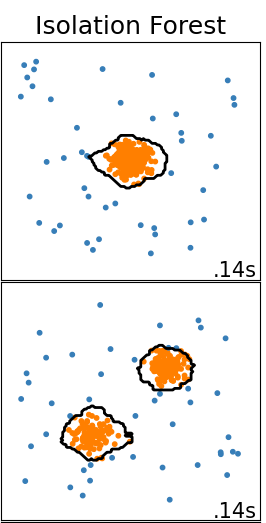

Referência: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py

In [ ]:
from sklearn.ensemble import IsolationForest

#Retorna -1 se a amostra é Outlier e 1 caso contrário
out_IF = IsolationForest(contamination=0.1).fit_predict(X)

outliers = X[out_IF != 1 , :]
X_out    = X[out_IF != -1, :]

print('Nº Outliers: %i' % outliers.shape[0])
print('\nDados sem Outliers')
print('Nº Variáveis: %i' %X_out.shape[1])
print('Nº Amostras: %i' %X_out.shape[0])

Nº Outliers: 45

Dados sem Outliers
Nº Variáveis: 10
Nº Amostras: 397


# **Regressão Linear Multivariada**

Vejamos um exemplo de como a Regressão Linear é afetada pelos Outliers

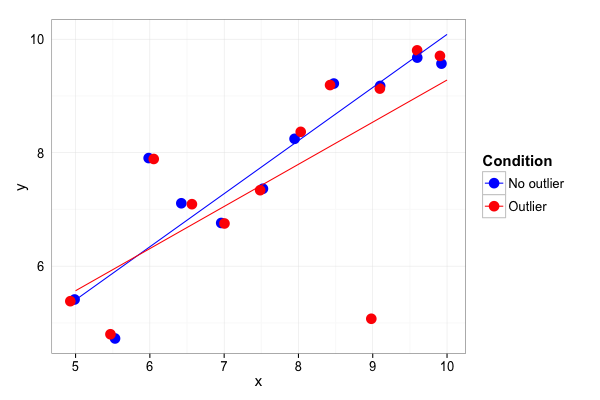

Referência: https://areshenk-research-notes.com/robust-t-regression/

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
#Separa os dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#Aplica a Regressão Linear
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Regressão Linear com Outliers')
print('MAE: %.4f' %mean_absolute_error(y_test, y_pred))

Regressão Linear com Outliers
MAE: 42.0024


In [ ]:
#Aplica a remoção de Outliers nos dados de treinamento
out_IF = IsolationForest(contamination=0.1).fit_predict(X_train)

X_train_wo = X_train[out_IF == 1, :]
y_train_wo = y_train[out_IF == 1]

#Aplica a Regressão Linear nos dados sem Outliers
lr = LinearRegression().fit(X_train_wo, y_train_wo)
y_pred_wo = lr.predict(X_test)

print('Regressão Linear sem Outliers')
print('MAE: %.4f' %mean_absolute_error(y_test, y_pred_wo))

Regressão Linear sem Outliers
MAE: 41.4283
